In [24]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pathlib import Path

_checkpoint_folder = Path("../results/dqn_rllib_multi_2")
_num_iters = 100
_checkpoint_freq = 10
_train_res_fname = "train_res.json"

def create_save_folder(base, cur_iter):
    return base / f"iter_{cur_iter:05d}/"

all_data = []
for cur_iter in range(0, _num_iters + 1, _checkpoint_freq):
    save_folder = create_save_folder(_checkpoint_folder, cur_iter)
    with open(save_folder / _train_res_fname, "r") as f:
        obj = json.load(f)

    all_data += [{
        "train_iter": obj["training_iteration"],
        "timesteps_total": obj["timesteps_total"],
        "episodes_total": obj["episodes_total"],
        **obj["custom_metrics"],
        # **obj["timers"],
        "time_total_s": obj["time_total_s"],
    }]

df_res = pd.DataFrame(all_data)

In [25]:
df_res

,train_iter,timesteps_total,episodes_total,winrate,n_won_battles,n_finished_battles,time_total_s
0,1,1000,96,0.208333,20.0,96,1.631141
1,11,11000,1030,0.320388,33.0,103,18.531114
2,21,21000,2027,0.290000,29.0,100,35.272639
3,31,31000,2931,0.230000,23.0,100,51.587194
4,41,41000,3828,0.270000,27.0,100,68.034113
5,51,51000,4729,0.670000,67.0,100,84.473238
6,61,61000,5596,0.710000,71.0,100,100.792597
7,71,71000,6493,0.350000,35.0,100,117.027990
8,81,81000,7406,0.630000,63.0,100,133.645660
9,91,91000,8332,0.690000,69.0,100,150.328033


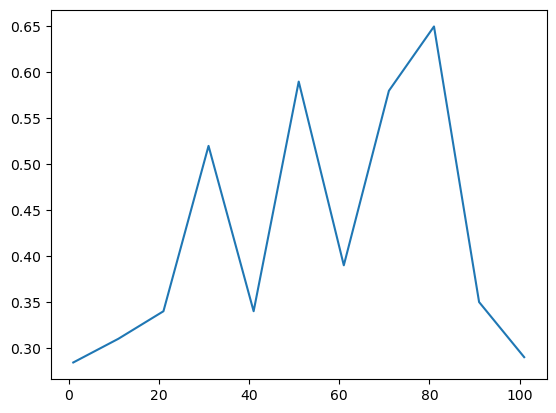

In [19]:
plt.plot(df_res["train_iter"], df_res["winrate"])

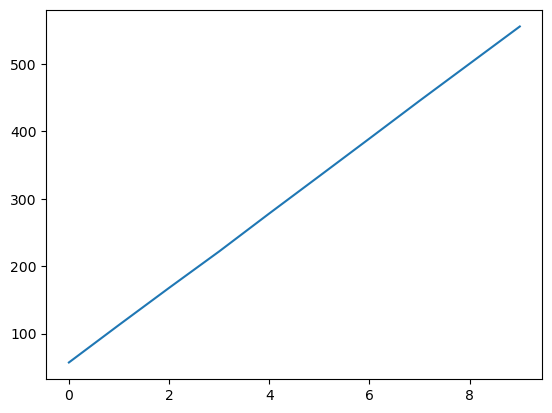

In [11]:
with open("../results/dqn_kerasrl/train_stats.json", "r") as f:
    obj = json.load(f)

df_keras = pd.DataFrame(obj)
df_keras
plt.plot(df_keras["wall_time"])

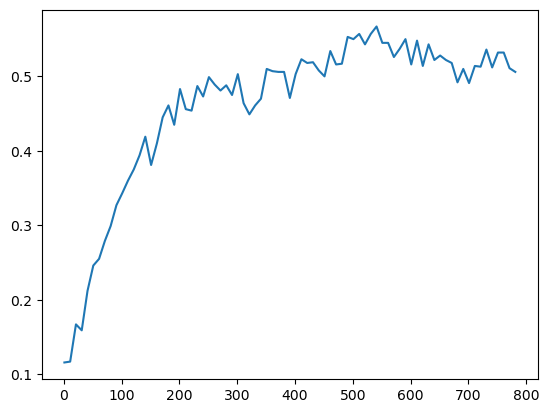

In [13]:
plt.plot(df_res["train_iter"], df_res["winrate"])